## Hyperparameter Analysis for GBM

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. The predictors can be chosen from a range of models like decision trees, regressors, classifiers etc. Because new predictors are learning from mistakes committed by previous predictors, it takes less time/iterations to reach close to actual predictions. But we have to choose the stopping criteria carefully or it could lead to overfitting on training data. Gradient Boosting is an example of boosting algorithm.

#### Importing required python libraries

In [165]:
import numpy as np
import pandas as pd
import seaborn as sns
import h2o
%matplotlib inline
import matplotlib.pyplot as plt
from h2o.automl import H2OAutoML
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from sklearn.model_selection import RandomizedSearchCV
import random, os, sys
from sklearn.ensemble import GradientBoostingRegressor

#### Reading the dataset

In [149]:
df_gbm=pd.read_csv("GBM.csv", decimal = ',')

#### Analysing the hyperparameter dataset for GBM models for all runtimes

In [150]:
df_gbm.head()

,model_id,run_time,validation_frame,nfolds,keep_cross_validation_models,keep_cross_validation_predictions,keep_cross_validation_fold_assignment,score_each_iteration,score_tree_interval,fold_assignment,...,histogram_type,max_abs_leafnode_pred,pred_noise_bandwidth,categorical_encoding,calibrate_model,calibration_frame,custom_metric_func,export_checkpoints_dir,monotone_constraints,check_constant_response
0,GBM_1_AutoML_20190410_190849_hyparameter,300,NaN,5,False,True,False,False,5,Modulo,...,Auto,1.7977E+308,0,AUTO,False,NaN,NaN,NaN,NaN,True
1,GBM_2_AutoML_20190410_190849_hyparameter,300,NaN,5,False,True,False,False,5,Modulo,...,Auto,1.7977E+308,0,AUTO,False,NaN,NaN,NaN,NaN,True
2,GBM_1_AutoML_20190419_184652_hyparameter,500,NaN,5,False,True,False,False,5,Modulo,...,Auto,1.7977E+308,0,AUTO,False,NaN,NaN,NaN,NaN,True
3,GBM_2_AutoML_20190419_184652_hyparameter,500,NaN,5,False,True,False,False,5,Modulo,...,Auto,1.7977E+308,0,AUTO,False,NaN,NaN,NaN,NaN,True
4,GBM_3_AutoML_20190419_184652_hyparameter,500,NaN,5,False,True,False,False,5,Modulo,...,Auto,1.7977E+308,0,AUTO,False,NaN,NaN,NaN,NaN,True


In [151]:
df_gbm.columns

Index(['model_id', 'run_time', 'validation_frame', 'nfolds',
       'keep_cross_validation_models', 'keep_cross_validation_predictions',
       'keep_cross_validation_fold_assignment', 'score_each_iteration',
       'score_tree_interval', 'fold_assignment', 'fold_column',
       'response_column', 'ignored_columns', 'ignore_const_cols',
       'offset_column', 'weights_column', 'balance_classes',
       'max_after_balance_size', 'max_confusion_matrix_size',
       'max_hit_ratio_k', 'ntrees', 'max_depth', 'min_rows', 'nbins',
       'nbins_top_level', 'nbins_cats', 'r2_stopping', 'stopping_rounds',
       'stopping_metric', 'stopping_tolerance', 'max_runtime_secs', 'seed',
       'build_tree_one_node', 'learn_rate', 'learn_rate_annealing',
       'distribution', 'quantile_alpha', 'tweedie_power', 'huber_alpha',
       'checkpoint', 'sample_rate', 'sample_rate_per_class', 'col_sample_rate',
       'col_sample_rate_change_per_level', 'col_sample_rate_per_tree',
       'min_split_improvem

In [152]:
df_gbm.isnull().any()

model_id                                 False
run_time                                 False
validation_frame                          True
nfolds                                   False
keep_cross_validation_models             False
keep_cross_validation_predictions        False
keep_cross_validation_fold_assignment    False
score_each_iteration                     False
score_tree_interval                      False
fold_assignment                          False
fold_column                               True
response_column                           True
ignored_columns                           True
ignore_const_cols                         True
offset_column                             True
weights_column                            True
balance_classes                          False
max_after_balance_size                   False
max_confusion_matrix_size                False
max_hit_ratio_k                          False
ntrees                                   False
max_depth    

In [153]:
df_gbm.drop(columns=['validation_frame'], axis=0, inplace=True)
df_gbm.drop(columns=['fold_column','response_column','ignored_columns','ignore_const_cols','offset_column'],axis=0,inplace=True)
df_gbm.drop(columns=['weights_column','checkpoint','sample_rate_per_class','calibration_frame','custom_metric_func'
                    ,'export_checkpoints_dir','monotone_constraints'],axis=0,inplace=True)

In [154]:
df_gbm.head()

,model_id,run_time,nfolds,keep_cross_validation_models,keep_cross_validation_predictions,keep_cross_validation_fold_assignment,score_each_iteration,score_tree_interval,fold_assignment,balance_classes,...,col_sample_rate,col_sample_rate_change_per_level,col_sample_rate_per_tree,min_split_improvement,histogram_type,max_abs_leafnode_pred,pred_noise_bandwidth,categorical_encoding,calibrate_model,check_constant_response
0,GBM_1_AutoML_20190410_190849_hyparameter,300,5,False,True,False,False,5,Modulo,False,...,0.8,1,0.8,0.0,Auto,1.7977E+308,0,AUTO,False,True
1,GBM_2_AutoML_20190410_190849_hyparameter,300,5,False,True,False,False,5,Modulo,False,...,0.8,1,0.8,0.0,Auto,1.7977E+308,0,AUTO,False,True
2,GBM_1_AutoML_20190419_184652_hyparameter,500,5,False,True,False,False,5,Modulo,False,...,1.0,1,0.8,1.0,Auto,1.7977E+308,0,AUTO,False,True
3,GBM_2_AutoML_20190419_184652_hyparameter,500,5,False,True,False,False,5,Modulo,False,...,0.8,1,0.8,1.0,Auto,1.7977E+308,0,AUTO,False,True
4,GBM_3_AutoML_20190419_184652_hyparameter,500,5,False,True,False,False,5,Modulo,False,...,0.8,1,0.8,1.0,Auto,1.7977E+308,0,AUTO,False,True


In [155]:
df_gbm.describe(include='all')

,model_id,run_time,nfolds,keep_cross_validation_models,keep_cross_validation_predictions,keep_cross_validation_fold_assignment,score_each_iteration,score_tree_interval,fold_assignment,balance_classes,...,col_sample_rate,col_sample_rate_change_per_level,col_sample_rate_per_tree,min_split_improvement,histogram_type,max_abs_leafnode_pred,pred_noise_bandwidth,categorical_encoding,calibrate_model,check_constant_response
count,10,10.000000,10.0,10,10,10,10,10.0,10,10,...,10,10.0,10,10,10,10,10.0,10,10,10
unique,10,NaN,NaN,1,1,1,1,NaN,1,1,...,2,NaN,1,2,1,1,NaN,1,1,1
top,GBM_1_AutoML_20190419_193618_hyparameter,NaN,NaN,False,True,False,False,NaN,Modulo,False,...,0.8,NaN,0.8,1.0,Auto,1.7977E+308,NaN,AUTO,False,True
freq,1,NaN,NaN,10,10,10,10,NaN,10,10,...,9,NaN,10,8,10,10,NaN,10,10,10
mean,NaN,910.000000,5.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
std,NaN,636.745196,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
min,NaN,300.000000,5.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
25%,NaN,500.000000,5.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
50%,NaN,750.000000,5.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
75%,NaN,1000.000000,5.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [156]:
df_gbm.dtypes

model_id                                 object
run_time                                  int64
nfolds                                    int64
keep_cross_validation_models               bool
keep_cross_validation_predictions          bool
keep_cross_validation_fold_assignment      bool
score_each_iteration                       bool
score_tree_interval                       int64
fold_assignment                          object
balance_classes                            bool
max_after_balance_size                    int64
max_confusion_matrix_size                 int64
max_hit_ratio_k                           int64
ntrees                                    int64
max_depth                                 int64
min_rows                                  int64
nbins                                     int64
nbins_top_level                           int64
nbins_cats                                int64
r2_stopping                              object
stopping_rounds                         

In [157]:
df_gbm["r2_stopping"] = df_gbm.r2_stopping.astype(float)
df_gbm["stopping_tolerance"] = df_gbm.stopping_tolerance.astype(float)
df_gbm["seed"] = df_gbm.seed.astype(float)
df_gbm["learn_rate"]=df_gbm.learn_rate.astype(float)
df_gbm["quantile_alpha"]=df_gbm.quantile_alpha.astype(float)
df_gbm["tweedie_power"]=df_gbm.tweedie_power.astype(float)
df_gbm["huber_alpha"]=df_gbm.huber_alpha.astype(float)
df_gbm["col_sample_rate"]=df_gbm.col_sample_rate.astype(float)
df_gbm["col_sample_rate_per_tree"]=df_gbm.col_sample_rate_per_tree.astype(float)
df_gbm["min_split_improvement"]=df_gbm.min_split_improvement.astype(float)
df_gbm["max_abs_leafnode_pred"]=df_gbm.max_abs_leafnode_pred.astype(float)

#### Dropping the colums with the values which are not responsible for giving any range

In [158]:
df_gbm= df_gbm.drop(columns=['fold_assignment','stopping_metric','distribution','sample_rate','histogram_type'])
df_gbm

,model_id,run_time,nfolds,keep_cross_validation_models,keep_cross_validation_predictions,keep_cross_validation_fold_assignment,score_each_iteration,score_tree_interval,balance_classes,max_after_balance_size,...,huber_alpha,col_sample_rate,col_sample_rate_change_per_level,col_sample_rate_per_tree,min_split_improvement,max_abs_leafnode_pred,pred_noise_bandwidth,categorical_encoding,calibrate_model,check_constant_response
0,GBM_1_AutoML_20190410_190849_hyparameter,300,5,False,True,False,False,5,False,5,...,0.9,0.8,1,0.8,0.0,inf,0,AUTO,False,True
1,GBM_2_AutoML_20190410_190849_hyparameter,300,5,False,True,False,False,5,False,5,...,0.9,0.8,1,0.8,0.0,inf,0,AUTO,False,True
2,GBM_1_AutoML_20190419_184652_hyparameter,500,5,False,True,False,False,5,False,5,...,0.9,1.0,1,0.8,1.0,inf,0,AUTO,False,True
3,GBM_2_AutoML_20190419_184652_hyparameter,500,5,False,True,False,False,5,False,5,...,0.9,0.8,1,0.8,1.0,inf,0,AUTO,False,True
4,GBM_3_AutoML_20190419_184652_hyparameter,500,5,False,True,False,False,5,False,5,...,0.9,0.8,1,0.8,1.0,inf,0,AUTO,False,True
5,GBM_1_AutoML_20190419_193618_hyparameter,1000,5,False,True,False,False,5,False,5,...,0.9,0.8,1,0.8,1.0,inf,0,AUTO,False,True
6,GBM_2_AutoML_20190419_193618_hyparameter,1000,5,False,True,False,False,5,False,5,...,0.9,0.8,1,0.8,1.0,inf,0,AUTO,False,True
7,GBM_3_AutoML_20190419_193618_hyparameter,1000,5,False,True,False,False,5,False,5,...,0.9,0.8,1,0.8,1.0,inf,0,AUTO,False,True
8,GBM_1_AutoML_20190420_141222_hyparameter,2000,5,False,True,False,False,5,False,5,...,0.9,0.8,1,0.8,1.0,inf,0,AUTO,False,True
9,GBM_2_AutoML_20190420_141222_hyparameter,2000,5,False,True,False,False,5,False,5,...,0.9,0.8,1,0.8,1.0,inf,0,AUTO,False,True


In [159]:
df_gbm= df_gbm.drop(columns=['keep_cross_validation_models','keep_cross_validation_predictions','keep_cross_validation_fold_assignment',
                             'categorical_encoding','score_each_iteration','balance_classes','build_tree_one_node','calibrate_model','check_constant_response'])
df_gbm

,model_id,run_time,nfolds,score_tree_interval,max_after_balance_size,max_confusion_matrix_size,max_hit_ratio_k,ntrees,max_depth,min_rows,...,learn_rate_annealing,quantile_alpha,tweedie_power,huber_alpha,col_sample_rate,col_sample_rate_change_per_level,col_sample_rate_per_tree,min_split_improvement,max_abs_leafnode_pred,pred_noise_bandwidth
0,GBM_1_AutoML_20190410_190849_hyparameter,300,5,5,5,20,0,17,15,100,...,1,0.5,1.5,0.9,0.8,1,0.8,0.0,inf,0
1,GBM_2_AutoML_20190410_190849_hyparameter,300,5,5,5,20,0,17,15,100,...,1,0.5,1.5,0.9,0.8,1,0.8,0.0,inf,0
2,GBM_1_AutoML_20190419_184652_hyparameter,500,5,5,5,20,0,5,15,100,...,1,0.5,1.5,0.9,1.0,1,0.8,1.0,inf,0
3,GBM_2_AutoML_20190419_184652_hyparameter,500,5,5,5,20,0,5,15,100,...,1,0.5,1.5,0.9,0.8,1,0.8,1.0,inf,0
4,GBM_3_AutoML_20190419_184652_hyparameter,500,5,5,5,20,0,5,15,100,...,1,0.5,1.5,0.9,0.8,1,0.8,1.0,inf,0
5,GBM_1_AutoML_20190419_193618_hyparameter,1000,5,5,5,20,0,34,15,100,...,1,0.5,1.5,0.9,0.8,1,0.8,1.0,inf,0
6,GBM_2_AutoML_20190419_193618_hyparameter,1000,5,5,5,20,0,34,15,100,...,1,0.5,1.5,0.9,0.8,1,0.8,1.0,inf,0
7,GBM_3_AutoML_20190419_193618_hyparameter,1000,5,5,5,20,0,34,15,100,...,1,0.5,1.5,0.9,0.8,1,0.8,1.0,inf,0
8,GBM_1_AutoML_20190420_141222_hyparameter,2000,5,5,5,20,0,445,15,100,...,1,0.5,1.5,0.9,0.8,1,0.8,1.0,inf,0
9,GBM_2_AutoML_20190420_141222_hyparameter,2000,5,5,5,20,0,445,15,100,...,1,0.5,1.5,0.9,0.8,1,0.8,1.0,inf,0


In [160]:
df_gbm.dtypes

model_id                             object
run_time                              int64
nfolds                                int64
score_tree_interval                   int64
max_after_balance_size                int64
max_confusion_matrix_size             int64
max_hit_ratio_k                       int64
ntrees                                int64
max_depth                             int64
min_rows                              int64
nbins                                 int64
nbins_top_level                       int64
nbins_cats                            int64
r2_stopping                         float64
stopping_rounds                       int64
stopping_tolerance                  float64
max_runtime_secs                     object
seed                                float64
learn_rate                          float64
learn_rate_annealing                  int64
quantile_alpha                      float64
tweedie_power                       float64
huber_alpha                     

#### Finding Hyperparameters

1. Trying to find the important hyperparameters using Correlation matrix

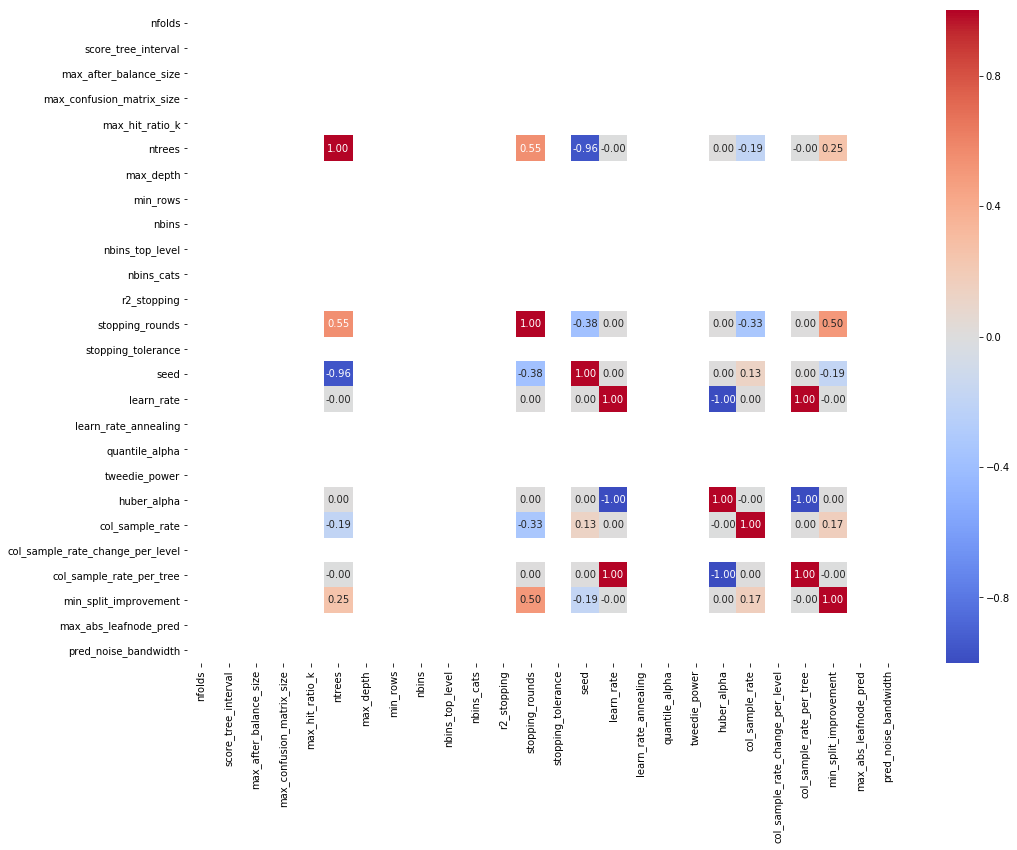

In [168]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df_gbm.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

Based on the above heatmap, we observe that ntrees, stopping_rounds and seed are important hyperparameters for GBM model.
We will see the range of only these 3 hyperparameters.

In [192]:
df_gbm

,model_id,run_time,nfolds,score_tree_interval,max_after_balance_size,max_confusion_matrix_size,max_hit_ratio_k,ntrees,max_depth,min_rows,...,learn_rate_annealing,quantile_alpha,tweedie_power,huber_alpha,col_sample_rate,col_sample_rate_change_per_level,col_sample_rate_per_tree,min_split_improvement,max_abs_leafnode_pred,pred_noise_bandwidth
0,GBM_1_AutoML_20190410_190849_hyparameter,300,5,5,5,20,0,17,15,100,...,1,0.5,1.5,0.9,0.8,1,0.8,0.0,inf,0
1,GBM_2_AutoML_20190410_190849_hyparameter,300,5,5,5,20,0,17,15,100,...,1,0.5,1.5,0.9,0.8,1,0.8,0.0,inf,0
2,GBM_1_AutoML_20190419_184652_hyparameter,500,5,5,5,20,0,5,15,100,...,1,0.5,1.5,0.9,1.0,1,0.8,1.0,inf,0
3,GBM_2_AutoML_20190419_184652_hyparameter,500,5,5,5,20,0,5,15,100,...,1,0.5,1.5,0.9,0.8,1,0.8,1.0,inf,0
4,GBM_3_AutoML_20190419_184652_hyparameter,500,5,5,5,20,0,5,15,100,...,1,0.5,1.5,0.9,0.8,1,0.8,1.0,inf,0
5,GBM_1_AutoML_20190419_193618_hyparameter,1000,5,5,5,20,0,34,15,100,...,1,0.5,1.5,0.9,0.8,1,0.8,1.0,inf,0
6,GBM_2_AutoML_20190419_193618_hyparameter,1000,5,5,5,20,0,34,15,100,...,1,0.5,1.5,0.9,0.8,1,0.8,1.0,inf,0
7,GBM_3_AutoML_20190419_193618_hyparameter,1000,5,5,5,20,0,34,15,100,...,1,0.5,1.5,0.9,0.8,1,0.8,1.0,inf,0
8,GBM_1_AutoML_20190420_141222_hyparameter,2000,5,5,5,20,0,445,15,100,...,1,0.5,1.5,0.9,0.8,1,0.8,1.0,inf,0
9,GBM_2_AutoML_20190420_141222_hyparameter,2000,5,5,5,20,0,445,15,100,...,1,0.5,1.5,0.9,0.8,1,0.8,1.0,inf,0


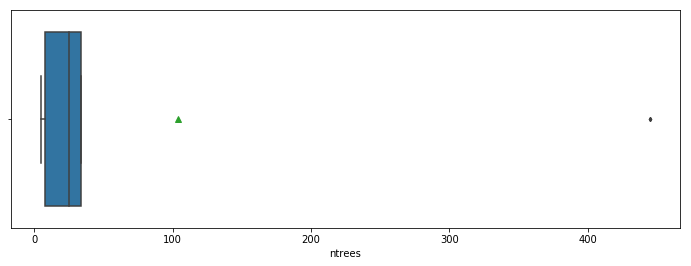

In [193]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x = df_gbm["ntrees"], data = df, orient = 'h', width = 0.8, fliersize = 3, showmeans=True, ax = ax)
plt.show()

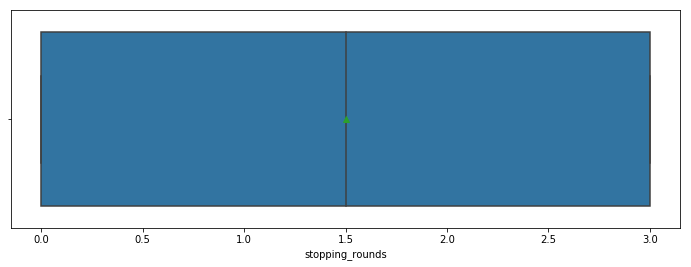

In [195]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x = df_gbm["stopping_rounds"], data = df, orient = 'h', width = 0.8, fliersize = 3, showmeans=True, ax = ax)
plt.show()

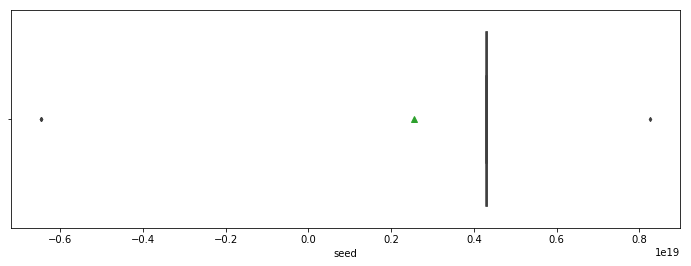

In [196]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x = df_gbm["seed"], data = df, orient = 'h', width = 0.8, fliersize = 3, showmeans=True, ax = ax)
plt.show()

In [197]:
treemin=df_gbm['ntrees'].min()
treemax=df_gbm['ntrees'].max()
seedmin=df_gbm['seed'].min()
seedmax=df_gbm['seed'].max()
srmin=df_gbm['stopping_rounds'].min()
srmax=df_gbm['stopping_rounds'].max()

In [178]:
df_gbm

,model_id,run_time,nfolds,score_tree_interval,max_after_balance_size,max_confusion_matrix_size,max_hit_ratio_k,ntrees,max_depth,min_rows,...,learn_rate_annealing,quantile_alpha,tweedie_power,huber_alpha,col_sample_rate,col_sample_rate_change_per_level,col_sample_rate_per_tree,min_split_improvement,max_abs_leafnode_pred,pred_noise_bandwidth
0,GBM_1_AutoML_20190410_190849_hyparameter,300,5,5,5,20,0,17,15,100,...,1,0.5,1.5,0.9,0.8,1,0.8,0.0,inf,0
1,GBM_2_AutoML_20190410_190849_hyparameter,300,5,5,5,20,0,17,15,100,...,1,0.5,1.5,0.9,0.8,1,0.8,0.0,inf,0
2,GBM_1_AutoML_20190419_184652_hyparameter,500,5,5,5,20,0,5,15,100,...,1,0.5,1.5,0.9,1.0,1,0.8,1.0,inf,0
3,GBM_2_AutoML_20190419_184652_hyparameter,500,5,5,5,20,0,5,15,100,...,1,0.5,1.5,0.9,0.8,1,0.8,1.0,inf,0
4,GBM_3_AutoML_20190419_184652_hyparameter,500,5,5,5,20,0,5,15,100,...,1,0.5,1.5,0.9,0.8,1,0.8,1.0,inf,0
5,GBM_1_AutoML_20190419_193618_hyparameter,1000,5,5,5,20,0,34,15,100,...,1,0.5,1.5,0.9,0.8,1,0.8,1.0,inf,0
6,GBM_2_AutoML_20190419_193618_hyparameter,1000,5,5,5,20,0,34,15,100,...,1,0.5,1.5,0.9,0.8,1,0.8,1.0,inf,0
7,GBM_3_AutoML_20190419_193618_hyparameter,1000,5,5,5,20,0,34,15,100,...,1,0.5,1.5,0.9,0.8,1,0.8,1.0,inf,0
8,GBM_1_AutoML_20190420_141222_hyparameter,2000,5,5,5,20,0,445,15,100,...,1,0.5,1.5,0.9,0.8,1,0.8,1.0,inf,0
9,GBM_2_AutoML_20190420_141222_hyparameter,2000,5,5,5,20,0,445,15,100,...,1,0.5,1.5,0.9,0.8,1,0.8,1.0,inf,0


#### 2. Analysing the range of important hyperparameters across all run times

In [190]:
GBM_all = pd.DataFrame({
    'Hyperparameters': ['ntrees', 'Stopping_round', 'seed'],
    'Min': [treemin,srmin,seedmin],
     'Max': [treemax,srmax,seedmax]})
GBM_all

,Hyperparameters,Min,Max
0,ntrees,5.000000e+00,4.450000e+02
1,Stopping_round,0.000000e+00,3.000000e+00
2,seed,-6.460620e+18,8.254820e+18


By comparing all 5 runtime for GBM model:

The range for most of the Hyperparameters remain same throughout all runtime.</br>

Hyperparameter ntrees value was 17 in 300 seconds runtime, 5 in 500 seconds, 34 in 1000 seconds and 445 in 2000 seconds. As and when the run time increased, ntrees value also increased.</br>

Hyperparameter Stopping_rounds value was 0 in 300 seconds runtime, 0 in 500 seconds, 3 in 1000 seconds and 3 in 2000 seconds. As and when the run time increased, Stopping_rounds value also increased. A significant increase in runtime changed the value of hyperparameter.</br>

Hyperparameter seed value was 4.28813E+18 in 300 seconds runtime, 4.3094E+18 in 500 seconds,4.3094E+18 to 8.25482E+18 in 1000 seconds and -6.46062E+18 in 2000 seconds. As and when the run time increased, seed value also increased and then further decreased after certain point.</br>